In [37]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import random
from sklearn import linear_model
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# I - Loading data from text file

In [38]:
dir_path = os.path.join(os.getcwd(), 'vnexpress')
categories = list()

data = list()
for directory in os.listdir(dir_path):
#     print(directory)
    if '.' not in directory:
        list_file_path = os.path.join(dir_path, directory)
        count = 0
        for file_name in os.listdir(list_file_path):
            data_dict = dict()
            data_dict['file_name'] = file_name
            data_dict['category'] = directory
            file_path = os.path.join(list_file_path, file_name)
            file = open(file_path,'r')
            data_dict['data'] = file.read()
            data.append(data_dict)
data_df = pd.DataFrame(data)

70% of dataset is used for training and remain 30% is used for testing

In [39]:
# sample_df = data_df.sample(10000)
sample_df = data_df
train, test = train_test_split(sample_df, test_size = 0.3)
training_data = train.data
training_label = train.category
testing_data = test.data
testing_label = test.category
len(training_data)

33240

# II- Using tf-idf to transform document to vector

In [40]:
t0=time()
vectorizer = TfidfVectorizer()
vectorizer.fit(training_data)
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## Extracting features for training and testing data

In [41]:
training_matrix = vectorizer.transform(training_data)
testing_matrix = vectorizer.transform(testing_data)

In [42]:
print('training',training_matrix.shape)
print('testing',testing_matrix.shape)

training (33240, 138169)
testing (14247, 138169)


## Classification by Logistic Regression of Scikit Learn

In [43]:
logreg = linear_model.LogisticRegression()
logreg.fit(training_matrix,training_label)
print('Training Time consuming:',time()-t0)

Training Time consuming: 51.11676001548767


In [44]:
t0=time()
predicted_result = logreg.predict(testing_matrix)
print('Testing Time consuming:',time()-t0)

Testing Time consuming: 0.06226301193237305


In [16]:
from sklearn import svm,metrics,model_selection
print(metrics.classification_report(testing_label, predicted_result))

             precision    recall  f1-score   support

     dulich       0.94      0.92      0.93      1199
    giaitri       0.96      0.98      0.97      1379
    giaoduc       0.94      0.93      0.94      1255
    khoahoc       0.91      0.94      0.93      1288
  kinhdoanh       0.90      0.91      0.91      1314
   otoxemay       0.97      0.97      0.97      1282
   phapluat       0.95      0.93      0.94      1375
      sohoa       0.95      0.94      0.94      1197
    thegioi       0.94      0.94      0.94      1363
    thethao       0.99      0.99      0.99      1394
     thoisu       0.87      0.87      0.87      1201

avg / total       0.94      0.94      0.94     14247



In [17]:
df_confusion = pd.crosstab(testing_label, predicted_result, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,dulich,giaitri,giaoduc,khoahoc,kinhdoanh,otoxemay,phapluat,sohoa,thegioi,thethao,thoisu,All
Actual,,,,,,,,,,,,
dulich,1109,8,11,24,9,3,5,3,12,3,12,1199
giaitri,6,1349,4,6,3,0,1,2,4,2,2,1379
giaoduc,4,5,1173,18,14,0,3,15,3,2,18,1255
khoahoc,8,7,13,1216,5,10,0,4,19,1,5,1288
kinhdoanh,11,2,5,6,1195,9,10,19,8,1,48,1314
otoxemay,3,2,4,7,9,1242,1,5,2,1,6,1282
phapluat,2,0,10,0,15,11,1278,2,1,0,56,1375
sohoa,4,10,4,10,26,2,3,1121,14,1,2,1197
thegioi,11,14,11,30,6,3,8,2,1275,0,3,1363


## Feature Size and Number of Documents

In [18]:
size = list()
numOfDoc = [1000,5000,10000,15000,20000,25000,30000,35000,40000,45000]
for N in numOfDoc:
    sample_df = data_df.sample(N)
    vectorizer = TfidfVectorizer()
    vector = vectorizer.fit_transform(sample_df.data)
    size.append(vector.shape[1])

In [24]:
size

[19721, 46803, 68913, 87189, 102006, 116749, 129897, 141683, 153063, 164120]

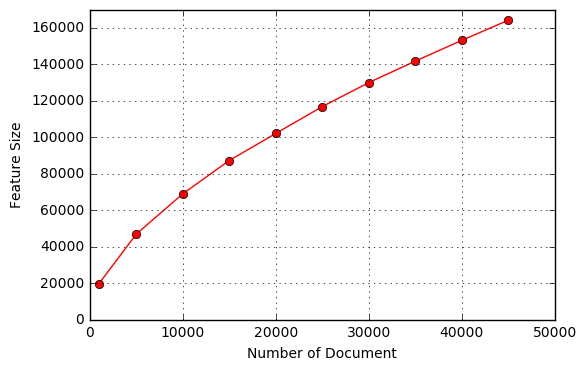

In [27]:
import matplotlib.pyplot as plt
plt.plot(numOfDoc, size,'ro-')
plt.axis([0, 50000, 0, 170000])
plt.xlabel('Number of Document')
plt.ylabel('Feature Size')
plt.grid(True)
plt.show()